In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from alipy.experiment.al_experiment import AlExperiment  # AlExperiment 임포트
import matplotlib.pyplot as plt
import joblib


PLAYER_DATA_PATH = r'C:\Users\inho0\OneDrive\문서\GitHub\Tobigs_PUBG\output\player_data_enriched.csv'
df = pd.read_csv(PLAYER_DATA_PATH)
df.drop_duplicates(inplace=True)

,match_id,map_name,game_mode,player_id,player_name,player_account_id,primary_weapon,secondary_weapon,armor_type,use_of_health_items,...,win_place,team_id,team_rank,team_won,elapsedTime,numAlivePlayers,user_id,match_start_datetime,match_date,match_duration
0,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,2727aabd-287a-41dc-adce-04148d7cdafc,seulO_O,account.ae62cf516f08404ab2a7f13130efa57a,Item_Weapon_MP5K_C,Item_Weapon_Pan_C,NaN,0,...,4,10.0,4.0,False,0.0,80.0,13798285,2024-11-28 12:42:54,2024-11-28,1396
1,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,4f3cd113-9a48-43c3-82f3-f9045cfb21a8,H_O_L_I_C,account.fd5033f4029d496b8c672108f191efb3,Item_Weapon_Thompson_C,Item_Weapon_MP5K_C,NaN,0,...,17,26.0,17.0,False,0.0,95.0,13798285,2024-11-28 12:42:54,2024-11-28,1396
2,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,fbd5d5b1-e3e8-49c3-8e5f-8b03a607ca56,ZER0_100,account.73ab78e3325d4cfbb9f2101683736830,Item_Weapon_ACE32_C,Item_Weapon_Winchester_C,NaN,0,...,21,7.0,21.0,False,0.0,78.0,13798285,2024-11-28 12:42:54,2024-11-28,1396
3,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,e87810c3-6195-49ca-995a-672b13a23826,Anthony-Davis2,account.dc5cce3eacc74887b2640825394a4cfc,Item_Weapon_HK416_C,NaN,NaN,0,...,23,5.0,23.0,False,0.0,82.0,13798285,2024-11-28 12:42:54,2024-11-28,1396
4,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,e766fb44-d306-43f0-9983-3bc6acb92a29,ksj2837,account.20dc2e5c10d7426fbd8f24dbb948cb4c,Item_Weapon_BerylM762_C,Item_Weapon_M79_C,NaN,0,...,1,6.0,1.0,True,0.0,82.0,13798285,2024-11-28 12:42:54,2024-11-28,1396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170751,fbe581ee-9112-4703-b8bd-8d0cb9e4dd85,Desert_Main,landmark,02d2f812-373f-4f3c-a8b6-b29a18ab4978,yjunbe,account.1441a4ba10bb4fba81c0b23ebe3ea8a3,Item_Weapon_Cowbar_C,NaN,NaN,0,...,11,14.0,11.0,False,0.0,55.0,Zyossba,2024-11-27 12:27:44,2024-11-27,247
170752,fbe581ee-9112-4703-b8bd-8d0cb9e4dd85,Desert_Main,landmark,c2f50fca-28bc-4e7b-a16b-addd0596920a,youngsweungwo,account.29c185695bb54828a47a5f442fb8c54e,NaN,NaN,NaN,0,...,4,4.0,4.0,False,0.0,41.0,Zyossba,2024-11-27 12:27:44,2024-11-27,247
170753,fbe581ee-9112-4703-b8bd-8d0cb9e4dd85,Desert_Main,landmark,eb5e37f9-9872-40d2-af18-aa759f0b0e7c,Lv4Frypan,account.0aa58a14bf5448caa28fe2920429c728,Item_Weapon_Sickle_C,Item_Weapon_Machete_C,NaN,0,...,7,6.0,7.0,False,0.0,40.0,Zyossba,2024-11-27 12:27:44,2024-11-27,247
170754,fbe581ee-9112-4703-b8bd-8d0cb9e4dd85,Desert_Main,landmark,214886f9-a3c0-47d4-98a0-4e011df3d97f,cafe-e,account.79f6d0568095401898f4e75d1a6f1646,NaN,NaN,NaN,0,...,15,9.0,15.0,False,0.0,49.0,Zyossba,2024-11-27 12:27:44,2024-11-27,247


In [3]:
df = df[['kills','team_kills','road_kills','vehicle_destroys']]

In [1]:
#### 데이터 파악

In [3]:
# 각 변수의 값 빈도수 계산
kills_counts = df['kills'].value_counts()
team_kills_counts = df['team_kills'].value_counts()
road_kills_counts = df['road_kills'].value_counts()
vehicle_destroys_counts = df['vehicle_destroys'].value_counts()

counts_summary = pd.DataFrame({
    "Kills": kills_counts,
    "Team Kills": team_kills_counts,
    "Road Kills": road_kills_counts,
    "Vehicle Destroys": vehicle_destroys_counts
}).fillna(0).astype(int) 

counts_summary

,Kills,Team Kills,Road Kills,Vehicle Destroys
0,97642,169636,170473,169693
1,34361,1049,233,995
2,17217,62,38,63
3,9220,9,7,5
4,5128,0,1,0
5,2757,0,2,0
6,1556,0,0,0
7,1021,0,2,0
8,602,0,0,0
9,326,0,0,0


In [3]:
# 파생 변수 생성
df['team_kill_ratio'] = df['team_kills'] / (df['kills'] + 1)
df['road_kill_ratio'] = df['road_kills'] / (df['kills'] + 1)
df['vehicle_destroy_ratio'] = df['vehicle_destroys'] / (df['kills'] + 1)
features = ['team_kill_ratio', 'road_kill_ratio', 'vehicle_destroy_ratio']
data = df[features]

In [5]:
team_kill_ratio_counts = data['team_kill_ratio'].value_counts()
road_kill_ratio_counts = data['road_kill_ratio'].value_counts()
vehicle_destroy_ratio_counts = data['vehicle_destroy_ratio'].value_counts()

ratio_counts_summary = pd.DataFrame({
    "Team Kill Ratio": team_kill_ratio_counts,
    "Road Kill Ratio": road_kill_ratio_counts,
    "Vehicle Destroy Ratio": vehicle_destroy_ratio_counts
}).fillna(0).astype(int) 

ratio_counts_summary

,Team Kill Ratio,Road Kill Ratio,Vehicle Destroy Ratio
0.000000,169636,170473,169693
0.030303,0,1,0
0.045455,0,1,0
0.052632,1,1,0
0.058824,0,0,3
0.062500,0,1,1
0.066667,1,1,2
0.071429,1,0,8
0.076923,1,3,7
0.083333,5,3,1


In [ ]:

# 파생 변수 값이 0이 아닌 데이터만 필터링
filtered_data = data[
    (data['team_kill_ratio'] != 0) |
    (data['road_kill_ratio'] != 0) |
    (data['vehicle_destroy_ratio'] != 0)
]

filtered_data

In [9]:
filtered_data

,team_kill_ratio,road_kill_ratio,vehicle_destroy_ratio
19,0.500000,0.0,0.00
62,1.000000,0.0,0.00
188,0.666667,0.0,0.00
200,0.000000,0.0,0.25
283,1.000000,0.0,0.00
...,...,...,...
170520,1.000000,0.0,0.00
170532,1.000000,0.0,0.00
170623,0.250000,0.0,0.00
170642,1.000000,0.0,0.00


In [5]:
import plotly.express as px

# 각 변수에 할당할 색상 목록
colors = ['red', 'blue', 'green']

# 각 파생변수에 대해 히스토그램을 그리면서 색상 지정
for idx, feature in enumerate(features):
    fig = px.histogram(filtered_data, 
                       x=feature, 
                       nbins=50,
                       title=f'Histogram of {feature}',
                       labels={feature: feature},
                       color_discrete_sequence=[colors[idx]])  # 특정 색상 지정
    fig.show()


#### 전체 코드

C:\Users\inho0\AppData\Local\Temp\ipykernel_24464\2910451602.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DBSCAN_Label'] = dbscan_labels
C:\Users\inho0\AppData\Local\Temp\ipykernel_24464\2910451602.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Decision_Score'] = decision_scores
C:\Users\inho0\AppData\Local\Temp\ipykernel_24464\2910451602.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DBSCAN이 찾은 (노이즈 제외) 클러스터 수: 8
[INFO] 가장 가까운 클러스터 라벨: 0
[INFO] 가장 먼 클러스터 라벨: 4
[INFO] 최적 C=1, 검증 세트 정확도=1.0000
[INFO] decision_score 평균: 0.9264, 표준편차: 0.1603
[INFO] alpha: 0.05, Lower Threshold: 0.9184, Upper Threshold: 0.9344

[INFO] 결정 함수 값 상위 5개:
     team_kill_ratio  road_kill_ratio  vehicle_destroy_ratio  Decision_Score
19          0.500000              0.0                   0.00        1.023605
62          1.000000              0.0                   0.00        0.815821
188         0.666667              0.0                   0.00        1.000326
200         0.000000              0.0                   0.25        1.019872
283         1.000000              0.0                   0.00        0.815821

[INFO] 최종 라벨 분포:
Final_Label
manner         1471
none-manner     680
unlabeled        25
Name: count, dtype: int64
[INFO] 최적 SVM 모델과 스케일러를 저장했습니다.


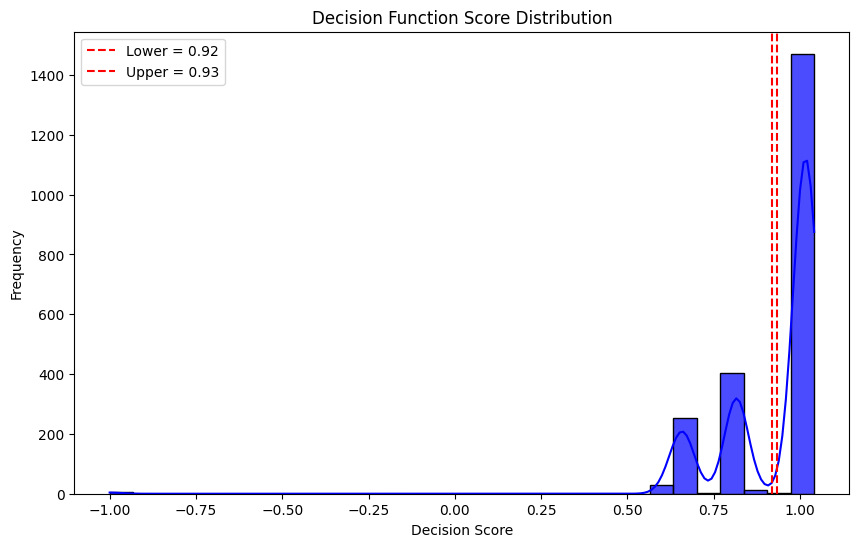

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os

# -------------------------------------------
# 데이터 로드 및 전처리
# -------------------------------------------
PLAYER_DATA_PATH = r'C:\Users\inho0\OneDrive\문서\GitHub\Tobigs_PUBG\output\player_data_enriched.csv'
df = pd.read_csv(PLAYER_DATA_PATH)
df.drop_duplicates(inplace=True)

# 파생 변수 생성
df['team_kill_ratio'] = df['team_kills'] / (df['kills'] + 1)
df['road_kill_ratio'] = df['road_kills'] / (df['kills'] + 1)
df['vehicle_destroy_ratio'] = df['vehicle_destroys'] / (df['kills'] + 1)

features = ['team_kill_ratio', 'road_kill_ratio', 'vehicle_destroy_ratio']
data = df[features]

# 3개 feature 값이 전부 0인 경우 제외
filtered_data = data[
    (data['team_kill_ratio'] != 0) |
    (data['road_kill_ratio'] != 0) |
    (data['vehicle_destroy_ratio'] != 0)
]

# 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data[features])

# -------------------------------------------
# DBSCAN으로 비지도 클러스터링
# -------------------------------------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
filtered_data['DBSCAN_Label'] = dbscan_labels

unique_clusters = set(dbscan_labels)
unique_clusters.discard(-1)  # 노이즈 제거
n_clusters = len(unique_clusters)

print(f"DBSCAN이 찾은 (노이즈 제외) 클러스터 수: {n_clusters}")

if n_clusters < 2:
    print("[INFO] 2개 이상의 클러스터가 없어, 모든 데이터를 'unlabeled' 처리합니다.")
    filtered_data['Final_Label'] = 'unlabeled'
    # SVM 모델 저장 없이 종료
else:
    # -------------------------------------------
    # "가장 가까운" vs "가장 먼" 클러스터 식별
    #    (원점 (0,0,0)와의 거리 기준)
    # -------------------------------------------
    centroids = []
    cluster_labels_sorted = sorted(list(unique_clusters))  # 클러스터 라벨 정렬
    for label in cluster_labels_sorted:
        points_in_cluster = scaled_data[dbscan_labels == label]
        centroid = points_in_cluster.mean(axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)

    distances = np.linalg.norm(centroids, axis=1)  # 각 중심점과 (0,0,0)의 거리
    closest_cluster_idx = np.argmin(distances)
    farthest_cluster_idx = np.argmax(distances)

    closest_cluster_label = cluster_labels_sorted[closest_cluster_idx]
    farthest_cluster_label = cluster_labels_sorted[farthest_cluster_idx]

    print(f"[INFO] 가장 가까운 클러스터 라벨: {closest_cluster_label}")
    print(f"[INFO] 가장 먼 클러스터 라벨: {farthest_cluster_label}")

    label_mapping = {
        closest_cluster_label: 'manner',
        farthest_cluster_label: 'none-manner'
    }

    # 두 클러스터만 추출해서 SVM 학습
    core_mask = (dbscan_labels == closest_cluster_label) | (dbscan_labels == farthest_cluster_label)
    X_core = scaled_data[core_mask]
    y_core = pd.Series(dbscan_labels[core_mask]).map(label_mapping)  # 'manner' / 'none-manner'

    # 이진 라벨(1 / 0)로 변환
    # manner -> 1, none-manner -> 0
    y_binary = np.where(y_core == 'manner', 1, 0)

    unique_train_labels = np.unique(y_binary)
    if len(unique_train_labels) < 2:
        print("[INFO] manner/none-manner 2개 클래스가 모두 존재하지 않아, 'unlabeled' 처리합니다.")
        filtered_data['Final_Label'] = 'unlabeled'
    else:
        # -------------------------------------------
        # Train/Test 분리 + 클래스 비율 유지
        # -------------------------------------------
        X_train, X_test, y_train, y_test = train_test_split(
            X_core, y_binary, test_size=0.2, random_state=42, stratify=y_binary
        )

        # -------------------------------------------
        # 여러 C 파라미터로 모델 탐색 → 가장 성능 좋은 모델 선택
        # -------------------------------------------
        best_acc = 0.0
        best_model = None
        best_c = None

        for c_val in [0.01, 0.1, 1, 10, 100]:
            svm_temp = SVC(kernel='rbf', probability=True, C=c_val, random_state=42)
            svm_temp.fit(X_train, y_train)
            pred_temp = svm_temp.predict(X_test)
            acc_temp = accuracy_score(y_test, pred_temp)

            if acc_temp > best_acc:
                best_acc = acc_temp
                best_model = svm_temp
                best_c = c_val

        print(f"[INFO] 최적 C={best_c}, 검증 세트 정확도={best_acc:.4f}")

        # 최적 모델로 전체 데이터에 대한 결정 함수 계산
        decision_scores = best_model.decision_function(scaled_data)

        filtered_data['Decision_Score'] = decision_scores

        # -------------------------------------------
        # mean ± (alpha * std)로 Threshold 결정
        # -------------------------------------------
        alpha = 0.05  # 필요 시 조정
        score_mean = np.mean(decision_scores)
        score_std = np.std(decision_scores)

        lower_threshold = score_mean - alpha * score_std
        upper_threshold = score_mean + alpha * score_std

        print(f"[INFO] decision_score 평균: {score_mean:.4f}, 표준편차: {score_std:.4f}")
        print(f"[INFO] alpha: {alpha}, Lower Threshold: {lower_threshold:.4f}, Upper Threshold: {upper_threshold:.4f}")

        # -------------------------------------------
        # 최종 라벨링
        #    - DBSCAN 노이즈(-1): 무조건 'unlabeled'
        #    - decision_score > upper_threshold → 'manner'
        #    - decision_score < lower_threshold → 'none-manner'
        #    - 나머지 → 'unlabeled'
        # -------------------------------------------
        final_labels = np.where(
            dbscan_labels == -1,  # 노이즈 먼저 체크
            'unlabeled',
            np.where(
                decision_scores > upper_threshold, 'manner',
                np.where(decision_scores < lower_threshold, 'none-manner', 'unlabeled')
            )
        )

        filtered_data['Final_Label'] = final_labels

        # -------------------------------------------
        # 결정 함수 값 및 라벨 분포 확인
        # -------------------------------------------
        print("\n[INFO] 결정 함수 값 상위 5개:")
        print(filtered_data[['team_kill_ratio', 'road_kill_ratio', 'vehicle_destroy_ratio', 'Decision_Score']].head())

        print("\n[INFO] 최종 라벨 분포:")
        print(filtered_data['Final_Label'].value_counts())

        # -------------------------------------------
        # 최종 모델 및 스케일러 저장
        # -------------------------------------------
        joblib.dump(best_model, r'C:\Users\inho0\OneDrive\문서\GitHub\Tobigs_PUBG\confer\model\manner\svm_model.pkl')
        joblib.dump(scaler, r'C:\Users\inho0\OneDrive\문서\GitHub\Tobigs_PUBG\confer\model\manner\scaler.pkl')
        print("[INFO] 최적 SVM 모델과 스케일러를 저장했습니다.")

        
        # Thresholds 저장
        thresholds = {
            'lower_threshold': lower_threshold,
            'upper_threshold': upper_threshold
        }
        joblib.dump(thresholds, r'C:\Users\inho0\OneDrive\문서\GitHub\Tobigs_PUBG\confer\model\manner\thresholds.pkl')

        # -------------------------------------------
        # 결정 함수 분포 시각화
        # -------------------------------------------
        plt.figure(figsize=(10, 6))
        sns.histplot(decision_scores, kde=True, bins=30, color='blue', alpha=0.7)
        plt.axvline(x=lower_threshold, color='red', linestyle='--',
                    label=f'Lower = {lower_threshold:.2f}')
        plt.axvline(x=upper_threshold, color='red', linestyle='--',
                    label=f'Upper = {upper_threshold:.2f}')
        plt.title('Decision Function Score Distribution')
        plt.xlabel('Decision Score')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

        # 3차원 시각화
        fig = px.scatter_3d(
            filtered_data,
            x='team_kill_ratio',
            y='road_kill_ratio',
            z='vehicle_destroy_ratio',
            color='Final_Label',
            title="DBSCAN + SVM 라벨링 결과 (3D)",
            labels={
                "team_kill_ratio": "Team Kill Ratio",
                "road_kill_ratio": "Road Kill Ratio",
                "vehicle_destroy_ratio": "Vehicle Destroy Ratio",
                "Final_Label": "Label"
            },
            color_discrete_map={
                'manner': 'blue',
                'none-manner': 'green',
                'unlabeled': 'orange'
            },
            size_max=10
        )
        fig.update_layout(width=1000, height=700)
        fig.show()


In [2]:
# -------------------------------------------
# 각 라벨에 따른 데이터 분리
# -------------------------------------------
manner_data = filtered_data[filtered_data['Final_Label'] == 'manner']
none_manner_data = filtered_data[filtered_data['Final_Label'] == 'none-manner']
unlabeled_data = filtered_data[filtered_data['Final_Label'] == 'unlabeled']

# -------------------------------------------
# 스케일링 이전 값으로 복원
# -------------------------------------------
# manner 데이터 복원
manner_original = scaler.inverse_transform(manner_data[features])
manner_df = pd.DataFrame(manner_original, columns=features)

# none-manner 데이터 복원
none_manner_original = scaler.inverse_transform(none_manner_data[features])
none_manner_df = pd.DataFrame(none_manner_original, columns=features)

# unlabeled 데이터 복원
unlabeled_original = scaler.inverse_transform(unlabeled_data[features])
unlabeled_df = pd.DataFrame(unlabeled_original, columns=features)

# -------------------------------------------
# 각 그룹 변수 평균 계산
# -------------------------------------------
manner_mean = manner_df.mean()
none_manner_mean = none_manner_df.mean()
unlabeled_mean = unlabeled_df.mean()

# 결과 출력
print("[INFO] 'manner' 그룹 변수 평균:")
print(manner_mean)

print("\n[INFO] 'none-manner' 그룹 변수 평균:")
print(none_manner_mean)

print("\n[INFO] 'unlabeled' 그룹 변수 평균:")
print(unlabeled_mean)


[INFO] 'manner' 그룹 변수 평균:
team_kill_ratio          0.350355
road_kill_ratio          0.040294
vehicle_destroy_ratio    0.240519
dtype: float64

[INFO] 'none-manner' 그룹 변수 평균:
team_kill_ratio          0.556916
road_kill_ratio          0.043703
vehicle_destroy_ratio    0.284913
dtype: float64

[INFO] 'unlabeled' 그룹 변수 평균:
team_kill_ratio          0.537398
road_kill_ratio          0.062951
vehicle_destroy_ratio    0.307627
dtype: float64


#### 가설 검정

In [4]:
from scipy.stats import shapiro, levene, ttest_ind

# -------------------------------------------
# 기본 전제 조건 확인
# -------------------------------------------

# 정규성 검정 (Shapiro-Wilk Test)
print("[INFO] 정규성 검정 결과:")
for feature in features:
    stat_m, p_m = shapiro(manner_df[feature])
    stat_n, p_n = shapiro(none_manner_df[feature])
    print(f"- {feature} (Manner): W-stat={stat_m:.4f}, p-value={p_m:.4f}")
    print(f"- {feature} (None-Manner): W-stat={stat_n:.4f}, p-value={p_n:.4f}")

    if p_m > 0.05 and p_n > 0.05:
        print(f"  → {feature}: 두 그룹 모두 정규성을 만족합니다.\n")
    else:
        print(f"  → {feature}: 정규성을 만족하지 않는 그룹이 있습니다.\n")

# 등분산성 검정 (Levene's Test)
print("[INFO] 등분산성 검정 결과:")
for feature in features:
    stat, p = levene(manner_df[feature], none_manner_df[feature])
    print(f"- {feature}: Levene-stat={stat:.4f}, p-value={p:.4f}")

    if p > 0.05:
        print(f"  → {feature}: 등분산성을 만족합니다.\n")
    else:
        print(f"  → {feature}: 등분산성을 만족하지 않습니다.\n")

# -------------------------------------------
# 통계적 검증 수행
# -------------------------------------------
print("[INFO] 통계적 검증 결과:")
for feature in features:
    if p_m > 0.05 and p_n > 0.05:  # 정규성을 만족하는 경우
        if p > 0.05:  # 등분산성을 만족하는 경우
            stat, p_val = ttest_ind(manner_df[feature], none_manner_df[feature], equal_var=True)
            test_type = "독립 표본 T-검정 (등분산 가정)"
        else:  # 등분산성을 만족하지 않는 경우
            stat, p_val = ttest_ind(manner_df[feature], none_manner_df[feature], equal_var=False)
            test_type = "독립 표본 T-검정 (등분산 가정 아님)"
    else:  # 정규성을 만족하지 않는 경우
        from scipy.stats import mannwhitneyu
        stat, p_val = mannwhitneyu(manner_df[feature], none_manner_df[feature], alternative='two-sided')
        test_type = "비모수 검정 (Mann-Whitney U 검정)"

    print(f"- {feature}:")
    print(f"  검정 방법: {test_type}")
    print(f"  검정 통계량={stat:.4f}, p-value={p_val:.4f}")
    if p_val < 0.05:
        print(f"  → {feature}: 두 그룹 간 통계적으로 유의한 차이가 있습니다.\n")
    else:
        print(f"  → {feature}: 두 그룹 간 통계적으로 유의한 차이가 없습니다.\n")


[INFO] 정규성 검정 결과:
- team_kill_ratio (Manner): W-stat=0.7065, p-value=0.0000
- team_kill_ratio (None-Manner): W-stat=0.6888, p-value=0.0000
  → team_kill_ratio: 정규성을 만족하지 않는 그룹이 있습니다.

- road_kill_ratio (Manner): W-stat=0.3792, p-value=0.0000
- road_kill_ratio (None-Manner): W-stat=0.3716, p-value=0.0000
  → road_kill_ratio: 정규성을 만족하지 않는 그룹이 있습니다.

- vehicle_destroy_ratio (Manner): W-stat=0.7903, p-value=0.0000
- vehicle_destroy_ratio (None-Manner): W-stat=0.5836, p-value=0.0000
  → vehicle_destroy_ratio: 정규성을 만족하지 않는 그룹이 있습니다.

[INFO] 등분산성 검정 결과:
- team_kill_ratio: Levene-stat=362.6106, p-value=0.0000
  → team_kill_ratio: 등분산성을 만족하지 않습니다.

- road_kill_ratio: Levene-stat=34.3914, p-value=0.0000
  → road_kill_ratio: 등분산성을 만족하지 않습니다.

- vehicle_destroy_ratio: Levene-stat=122.9602, p-value=0.0000
  → vehicle_destroy_ratio: 등분산성을 만족하지 않습니다.

[INFO] 통계적 검증 결과:
- team_kill_ratio:
  검정 방법: 비모수 검정 (Mann-Whitney U 검정)
  검정 통계량=273896.0000, p-value=0.0000
  → team_kill_ratio: 두 그룹 간 통계적으로 유의한 차이가

#### 군집 비교 시각화

In [5]:
# -------------------------------------------
# 시각화 데이터 준비
# -------------------------------------------
manner_plot_data = pd.DataFrame(scaler.inverse_transform(manner_data[features]), columns=features)
manner_plot_data['Group'] = 'Manner'

none_manner_plot_data = pd.DataFrame(scaler.inverse_transform(none_manner_data[features]), columns=features)
none_manner_plot_data['Group'] = 'None-Manner'

plot_data = pd.concat([manner_plot_data, none_manner_plot_data])

# -------------------------------------------
# 각 변수에 대해 Box Plot 시각화
# -------------------------------------------
for feature in features:
    fig = px.box(
        plot_data, 
        x='Group', 
        y=feature, 
        color='Group', 
        title=f"{feature} - Group Comparison",
        labels={'Group': 'Group', feature: feature},
        width=800, 
        height=500
    )
    fig.update_traces(boxmean=True)  # 평균값 표시
    fig.show()

# -------------------------------------------
# 각 변수에 대해 Violin Plot 시각화
# -------------------------------------------
for feature in features:
    fig = px.violin(
        plot_data, 
        x='Group', 
        y=feature, 
        color='Group', 
        box=True,  
        points='all',  
        title=f"{feature} - Group Comparison (Violin Plot)",
        labels={'Group': 'Group', feature: feature},
        width=800, 
        height=500
    )
    fig.update_traces(meanline_visible=True)  
    fig.show()


[INFO] '원점과 가까운 클러스터' 변수 평균:
team_kill_ratio          0.350411
road_kill_ratio          0.040292
vehicle_destroy_ratio    0.240558
dtype: float64

[INFO] '원점과 먼 클러스터' 변수 평균:
team_kill_ratio          0.293955
road_kill_ratio          0.037337
vehicle_destroy_ratio    0.813057
dtype: float64


C:\Users\inho0\AppData\Local\Temp\ipykernel_16664\2226886500.py:29: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\inho0\AppData\Local\Temp\ipykernel_16664\2226886500.py:30: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\inho0\AppData\Local\Temp\ipykernel_16664\2226886500.py:30: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



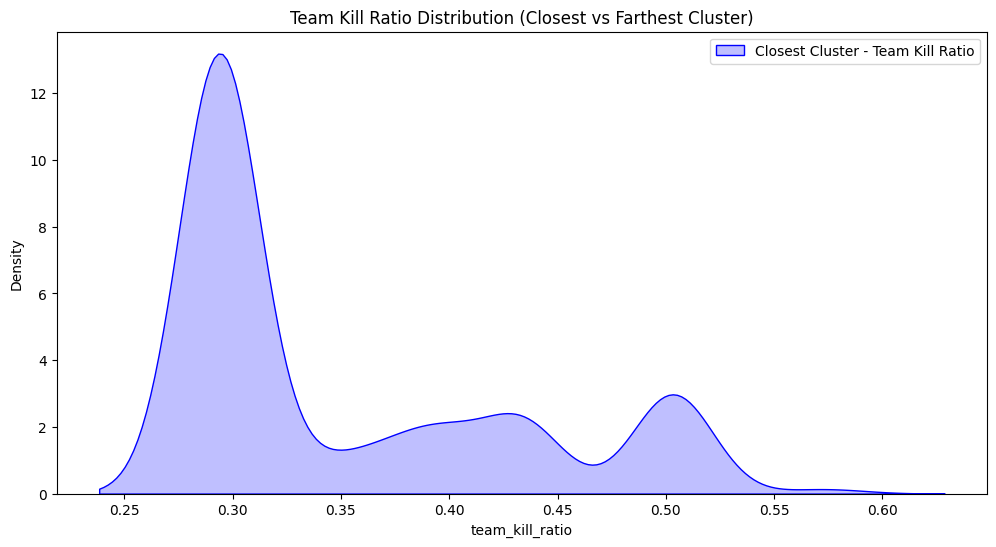

C:\Users\inho0\AppData\Local\Temp\ipykernel_16664\2226886500.py:36: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\inho0\AppData\Local\Temp\ipykernel_16664\2226886500.py:37: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\inho0\AppData\Local\Temp\ipykernel_16664\2226886500.py:37: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



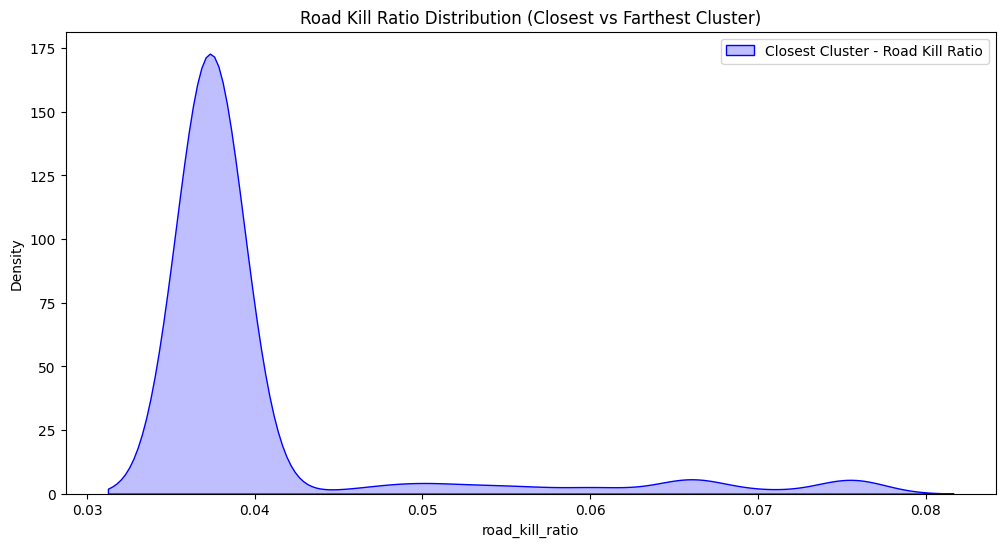

C:\Users\inho0\AppData\Local\Temp\ipykernel_16664\2226886500.py:43: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\inho0\AppData\Local\Temp\ipykernel_16664\2226886500.py:44: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\inho0\AppData\Local\Temp\ipykernel_16664\2226886500.py:44: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



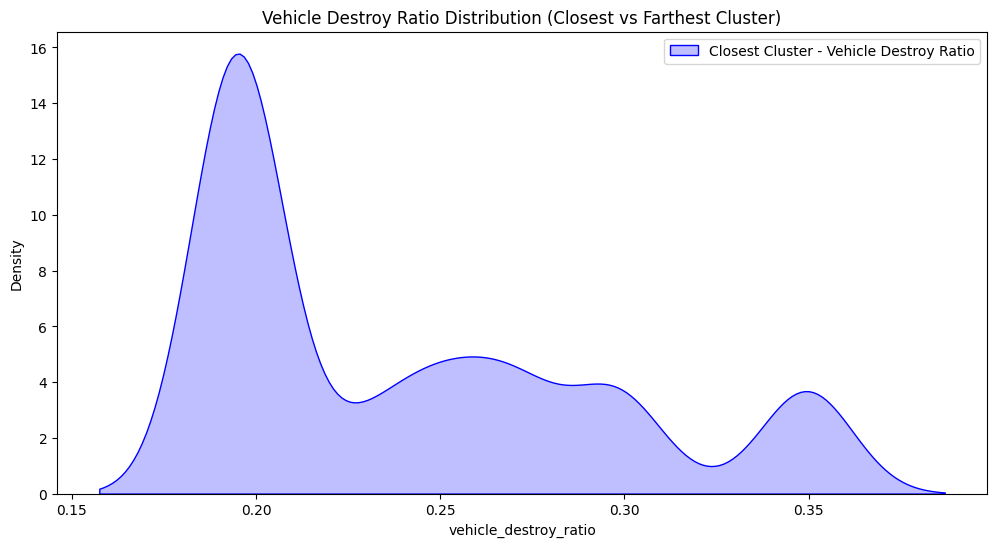

In [ ]:
# -------------------------------------------
# 12. 클러스터 데이터 복원 및 분석
# -------------------------------------------

# 1. 가장 가까운 클러스터와 가장 먼 클러스터 데이터 필터링
closest_cluster_data = filtered_data[dbscan_labels == closest_cluster_label]
farthest_cluster_data = filtered_data[dbscan_labels == farthest_cluster_label]

# 2. 스케일링 이전 값으로 복원
closest_cluster_original = scaler.inverse_transform(closest_cluster_data[features])
farthest_cluster_original = scaler.inverse_transform(farthest_cluster_data[features])

# 복원된 데이터를 데이터프레임으로 변환
closest_cluster_original_df = pd.DataFrame(closest_cluster_original, columns=features)
farthest_cluster_original_df = pd.DataFrame(farthest_cluster_original, columns=features)

# 3. 각 클러스터의 변수 평균 계산
closest_cluster_mean = closest_cluster_original_df.mean()
farthest_cluster_mean = farthest_cluster_original_df.mean()

print("[INFO] '원점과 가까운 클러스터' 변수 평균:")
print(closest_cluster_mean)

print("\n[INFO] '원점과 먼 클러스터' 변수 평균:")
print(farthest_cluster_mean)

# 4. 각 클러스터의 변수 분포 시각화
plt.figure(figsize=(12, 6))
sns.kdeplot(data=closest_cluster_original_df, x='team_kill_ratio', label='Closest Cluster - Team Kill Ratio', shade=True, color='blue')
sns.kdeplot(data=farthest_cluster_original_df, x='team_kill_ratio', label='Farthest Cluster - Team Kill Ratio', shade=True, color='green')
plt.title('Team Kill Ratio Distribution (Closest vs Farthest Cluster)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=closest_cluster_original_df, x='road_kill_ratio', label='Closest Cluster - Road Kill Ratio', shade=True, color='blue')
sns.kdeplot(data=farthest_cluster_original_df, x='road_kill_ratio', label='Farthest Cluster - Road Kill Ratio', shade=True, color='green')
plt.title('Road Kill Ratio Distribution (Closest vs Farthest Cluster)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=closest_cluster_original_df, x='vehicle_destroy_ratio', label='Closest Cluster - Vehicle Destroy Ratio', shade=True, color='blue')
sns.kdeplot(data=farthest_cluster_original_df, x='vehicle_destroy_ratio', label='Farthest Cluster - Vehicle Destroy Ratio', shade=True, color='green')
plt.title('Vehicle Destroy Ratio Distribution (Closest vs Farthest Cluster)')
plt.legend()
plt.show()

#### 추론 테스트

In [8]:
df[:1]

,match_id,map_name,game_mode,player_id,player_name,player_account_id,primary_weapon,secondary_weapon,armor_type,use_of_health_items,...,win_place,team_id,team_rank,team_won,elapsedTime,numAlivePlayers,user_id,match_start_datetime,match_date,match_duration
0,02c7c736-e103-4c2c-a8e7-ea4c967c379d,Savage_Main,squad,2727aabd-287a-41dc-adce-04148d7cdafc,seulO_O,account.ae62cf516f08404ab2a7f13130efa57a,Item_Weapon_MP5K_C,Item_Weapon_Pan_C,NaN,0,...,4,10.0,4.0,False,0.0,80.0,13798285,2024-11-28 12:42:54,2024-11-28,1396


In [11]:
import numpy as np
import pandas as pd
import joblib
import os

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# -------------------------------------------
# 1. 모델, 스케일러, Thresholds 로드
# -------------------------------------------
MODEL_PATH = r'C:\Users\inho0\OneDrive\문서\GitHub\Tobigs_PUBG\confer\model\manner\svm_model.pkl'
SCALER_PATH = r'C:\Users\inho0\OneDrive\문서\GitHub\Tobigs_PUBG\confer\model\manner\scaler.pkl'
THRESHOLDS_PATH = r'C:\Users\inho0\OneDrive\문서\GitHub\Tobigs_PUBG\confer\model\manner\thresholds.pkl'

# 모델과 스케일러, 임계값 로드
svm_model = joblib.load(MODEL_PATH)
scaler = joblib.load(SCALER_PATH)
thresholds = joblib.load(THRESHOLDS_PATH)
lower_threshold = thresholds['lower_threshold']
upper_threshold = thresholds['upper_threshold']

# -------------------------------------------
df_new = df[:1].copy()  # .copy()를 사용하여 명시적으로 복사본 생성

# -------------------------------------------
# 파생 변수 생성
# -------------------------------------------
df_new.loc[:, 'team_kill_ratio'] = df_new['team_kills'] / (df_new['kills'] + 1)
df_new.loc[:, 'road_kill_ratio'] = df_new['road_kills'] / (df_new['kills'] + 1)
df_new.loc[:, 'vehicle_destroy_ratio'] = df_new['vehicle_destroys'] / (df_new['kills'] + 1)

features = ['team_kill_ratio', 'road_kill_ratio', 'vehicle_destroy_ratio']
data_new = df_new[features]

# -------------------------------------------
# 스케일링
# -------------------------------------------
scaled_data_new = scaler.transform(data_new[features])

# -------------------------------------------
# 결정 함수 값 계산 및 Threshold 적용
# -------------------------------------------
decision_scores_new = svm_model.decision_function(scaled_data_new)

# 최종 라벨링
final_labels_new = np.where(
    decision_scores_new > upper_threshold, 'manner',
    np.where(decision_scores_new < lower_threshold, 'none-manner', 'unlabeled')
)

# 결정 함수 값 및 최종 라벨 추가
data_new.loc[:, 'Decision_Score'] = decision_scores_new
data_new.loc[:, 'Final_Label'] = final_labels_new

# -------------------------------------------
# 결과 출력
# -------------------------------------------
# 라벨 분포 출력
print("\n[INFO] 최종 라벨 분포:")
print(data_new['Final_Label'].value_counts())



[INFO] 최종 라벨 분포:
Final_Label
manner    1
Name: count, dtype: int64


C:\Users\inho0\AppData\Local\Temp\ipykernel_40888\1188967236.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\inho0\AppData\Local\Temp\ipykernel_40888\1188967236.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

